In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import shap

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()
print(breast_cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
features = breast_cancer_dataset['feature_names']
data = pd.DataFrame(breast_cancer_dataset['data'], columns=features)
data['target'] = breast_cancer_dataset['target']

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
train, test = train_test_split(data, test_size=.3, random_state=42)

In [5]:
clf = LogisticRegression(max_iter=5000, random_state=41)
clf.fit(train[features], train['target'])

print("Training results  -----------------")
print(classification_report(train['target'], clf.predict(train[features])))
print("\nTesting results  -----------------")
print(classification_report(test['target'], clf.predict(test[features])))

Training results  -----------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       149
           1       0.96      0.98      0.97       249

    accuracy                           0.96       398
   macro avg       0.96      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398


Testing results  -----------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [6]:
from shap import Explainer

exp = Explainer(clf, train[features])
shap_values = exp(test[features])

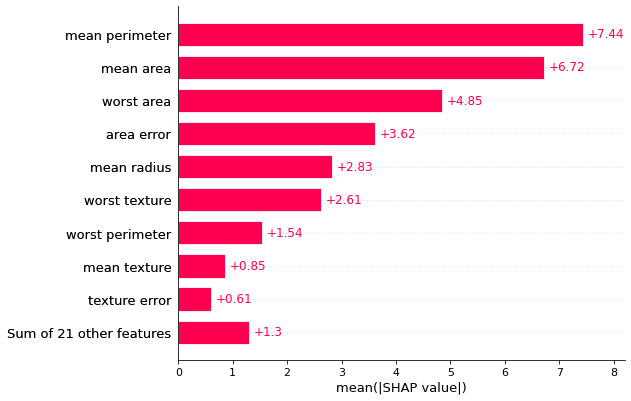

In [7]:
shap.plots.bar(shap_values)

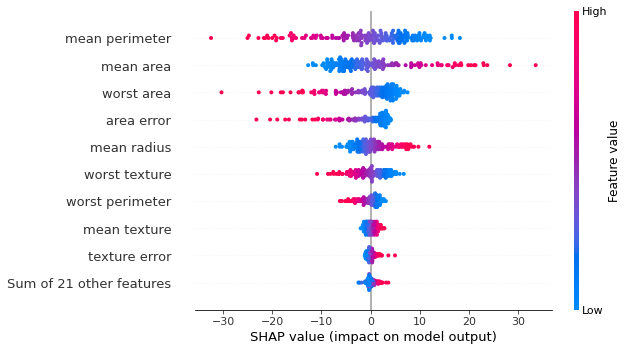

In [8]:
shap.plots.beeswarm(shap_values)

In [9]:
shap_df = pd.DataFrame(shap_values.values, columns=features)
shap_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.366233,-0.113927,3.363999,-3.675791,-0.000685,-0.001226,0.000676,0.001913,-0.001740,-0.000053,...,-0.064346,0.545950,0.478275,1.757715,-0.003651,0.012950,-0.006616,0.005023,-0.002862,-0.000340
1,5.373423,0.518873,-13.465100,13.597623,0.000661,-0.000570,-0.013831,-0.009960,0.005816,0.000280,...,0.695952,-0.439299,-3.502128,-12.074923,0.002991,0.015781,-0.008774,-0.034790,0.030290,0.001680
2,1.748383,0.091558,-4.795204,3.440397,-0.002029,-0.004959,-0.033865,-0.010351,-0.001872,0.000158,...,0.265450,-0.144740,-1.165742,-3.808638,-0.007071,0.011872,-0.157615,-0.020644,0.009812,0.000343
3,-1.439151,-0.328752,3.213562,-4.051590,-0.001494,-0.007063,0.002046,0.004851,0.000771,-0.000319,...,-0.225016,1.424547,0.845259,3.644989,-0.004335,-0.003970,0.029515,0.019322,0.029932,-0.000909
4,-2.334994,-1.085310,5.913502,-5.781330,-0.000711,-0.002629,0.007257,0.005441,0.000617,-0.000202,...,-0.272679,3.064935,1.462406,4.320263,-0.001342,0.030477,0.111216,0.021647,0.046186,0.000236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-1.043313,-0.606624,3.253151,-3.126752,-0.000496,0.010869,0.023263,0.004664,0.005639,0.000210,...,-0.180428,3.024307,1.069780,3.189761,0.000055,0.125653,0.213409,0.026976,0.042319,0.001847
167,0.998375,1.478580,-2.024005,1.300210,0.001694,0.006390,0.020917,0.004196,0.000133,0.000200,...,0.054042,-3.339180,-0.168505,0.028781,0.006782,0.080495,0.136293,0.000908,0.018046,0.001337
168,-4.039179,-0.240020,9.892153,-8.459895,-0.000310,-0.006566,-0.025612,0.002215,0.003899,-0.000688,...,-0.349554,0.672915,1.787791,5.107306,-0.000088,-0.025608,-0.116494,0.006257,0.025779,-0.003023
169,0.040032,1.261420,-1.085756,-0.637419,-0.003014,-0.015321,-0.028207,-0.006533,-0.009449,-0.000368,...,0.015604,-3.669289,-0.088726,0.475859,-0.014140,-0.094097,-0.102338,-0.021004,-0.048473,-0.003219


In [10]:

shap_df['worst area']

0       1.757715
1     -12.074923
2      -3.808638
3       3.644989
4       4.320263
         ...    
166     3.189761
167     0.028781
168     5.107306
169     0.475859
170     2.209450
Name: worst area, Length: 171, dtype: float64

In [11]:
shap_df[shap_df['worst area'] < -20]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
57,11.915160,1.359492,-32.428022,33.533610,-0.001621,-0.037584,-0.131075,-0.040144,0.000375,-0.000202,...,1.091092,-4.014634,-6.112042,-20.178210,-0.007841,-0.236332,-0.519606,-0.090238,0.044324,-0.001985
107,9.696386,0.173284,-24.747841,28.309742,0.000192,-0.006136,-0.044764,-0.015937,0.007512,0.000271,...,1.151824,0.937002,-6.100645,-22.739594,0.002820,-0.071110,-0.158019,-0.059222,0.004728,0.001037
113,7.238026,2.809562,-18.255316,21.300163,0.000013,-0.003149,-0.028726,-0.011958,0.001697,0.000202,...,1.282512,-10.891058,-6.243107,-30.307319,-0.002938,-0.004981,-0.110562,-0.028103,0.007592,0.000157


In [12]:
test.iloc[[57, 107, 113]]['worst area']

82     2562.0
503    2782.0
265    3432.0
Name: worst area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

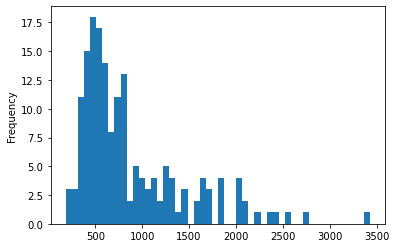

In [13]:
test['worst area'].plot.hist(bins=50)

(-20.0, 20.0)

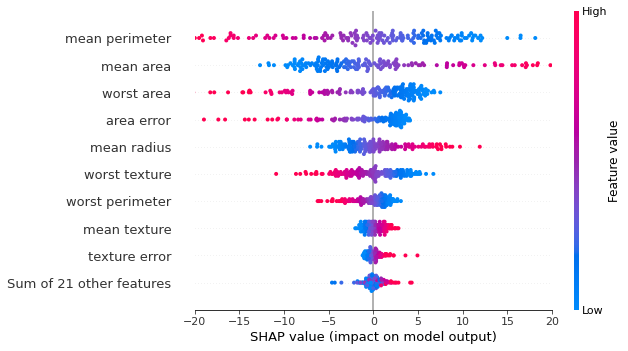

In [14]:
shap.plots.beeswarm(shap_values, show=False)
plt.gca().set_xlim(-20, 20)

(-2.2, 1.5)

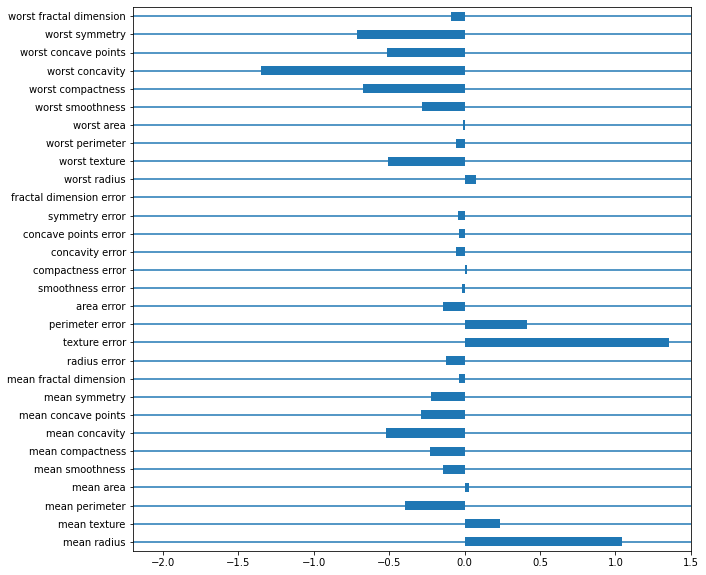

In [15]:
coefs = pd.Series(clf.coef_[0], features)
coefs.plot.barh()
plt.gcf().set_size_inches(10, 10)
plt.hlines(np.arange(len(features)), -2.2, 1.5)
plt.xlim(-2.2, 1.5)

In [16]:
coefs['worst area']

-0.011642654209255842

In [17]:
mask_big_area_shap = (shap_df['worst area'] < -20).values

In [18]:
shap_df[mask_big_area_shap][['worst area']]

,worst area
57,-20.178210
107,-22.739594
113,-30.307319


In [19]:
area_error_feature_value = test[mask_big_area_shap][['worst area']]
area_error_feature_value

,worst area
82,2562.0
503,2782.0
265,3432.0


In [20]:
area_error_feature_value * coefs['worst area']

,worst area
82,-29.828480
503,-32.389864
265,-39.957589


In [21]:
train['worst area'].mean()

881.8482412060312

In [22]:
distance_from_mean = area_error_feature_value - train['worst area'].mean()
distance_from_mean * coefs['worst area']

,worst area
82,-19.561426
503,-22.122810
265,-29.690535
